In [13]:
import pandas as pd 
import numpy as np 
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sn

In [14]:
df = pd.read_csv(r"C:\Training\Academy\Factor Analysis\Cases of Factor Analysis\Kaggle_Website satisfaction survey\survey.csv", index_col=0)
df.head()

,language,platform,gender,age,q1,q2,q3,q4,q5,q6,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
user_id,,,,,,,,,,,,,,,,,,,,,
080c468b-27c0-455c-aa63-b8f807f2e3d7,en,Desktop,male,34,9,7,6,6,7,7,...,8,4,6,5,6,6,5,2,5,3
0b0379c7-04db-4c85-84bd-a2bd55329e29,en,Mobile,female,19,10,10,10,9,10,10,...,10,10,10,10,10,10,10,10,9,8
0e623280-b28b-4d4a-8eea-0732f09ed497,en,Mobile,female,19,10,10,10,10,10,10,...,9,8,10,10,10,10,9,9,8,8
045dc0f3-a730-4d03-a615-f51814e5b04f,en,Mobile,male,21,5,8,5,5,5,5,...,7,9,10,8,8,10,10,8,10,6
092f2ee7-5281-4a09-9bce-e5523b95b53b,en,NaN,female,53,9,10,9,10,9,7,...,7,8,8,8,9,9,10,10,10,10


In [15]:
X = df.iloc[:,4:]
X.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25', 'q26'],
      dtype='object')

# Bartlett's test for adequacy

**In case if p-value>=0.05 then the factor analysis of the data will not be adequate.**

In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value 

(1600.8260587389138, 2.4169631508274825e-167)

p-value <0.05 indicates, the observed correlation matrix is not an identity matrix.
The factor analysis is adequate for this data

# Kaiser-Meyer-Olkin (KMO) 

This test measures the suitability of data for factor analysis. The suitable **KMO** value should be greater than 0.5.

In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model 

0.8679550321475634

KMO > 0.5 indicates that factor analysis is suitable for the data

In [18]:
fa = FactorAnalyzer()
fa.fit(X)

FactorAnalyzer(rotation_kwargs={})

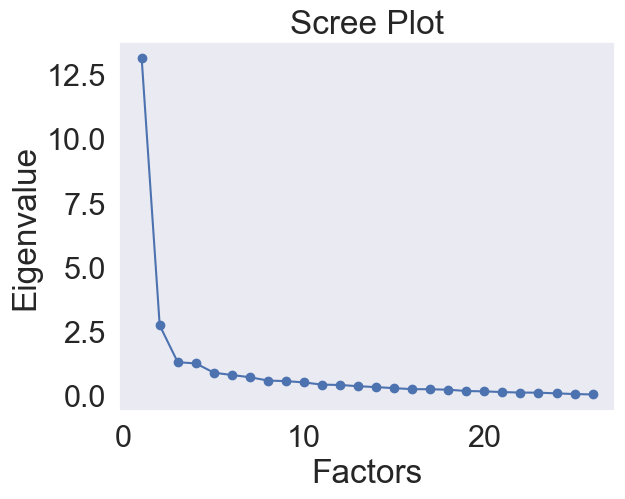

In [19]:
eigen_values, vectors = fa.get_eigenvalues()

# Scree plot of eigen values
plt.scatter(range(1,X.shape[1]+1),eigen_values)
plt.plot(range(1,X.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


# Factor analysis with 3 factors

In [20]:
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation='varimax')
fa.fit(X)
loadings = fa.loadings_
loadings

array([[ 0.21620387,  0.79602667, -0.08823829],
       [ 0.17537757,  0.80870825,  0.13774877],
       [ 0.11195611,  0.74569241,  0.08795269],
       [ 0.11596754,  0.77457007,  0.09348472],
       [ 0.31070868,  0.66626724,  0.22238692],
       [ 0.55877335,  0.239986  ,  0.26471682],
       [ 0.68308724,  0.3135642 ,  0.11476537],
       [ 0.48544033,  0.39369629,  0.37299066],
       [ 0.34068489,  0.07444834,  0.63095616],
       [ 0.36511736,  0.06040438,  0.69276   ],
       [ 0.52341542,  0.29320927,  0.55853477],
       [ 0.23751328,  0.10592186,  0.83245865],
       [ 0.67311902,  0.15848793,  0.32564806],
       [ 0.55129054,  0.31149409,  0.37494928],
       [ 0.49886564,  0.36377372,  0.37116645],
       [ 0.4613126 ,  0.07142665,  0.64772947],
       [ 0.74073856,  0.31015672,  0.23745402],
       [ 0.45188555,  0.27108743,  0.33936224],
       [ 0.64158281,  0.28069455,  0.3859127 ],
       [ 0.63088631,  0.41389448,  0.44507477],
       [ 0.46159591,  0.52742813,  0.335

In [22]:
factor_df=pd.DataFrame(loadings,index=X.columns)
factor_df.columns = ['Factor1', 'Factor2', 'Factor3']
factor_df

,Factor1,Factor2,Factor3
q1,0.216204,0.796027,-0.088238
q2,0.175378,0.808708,0.137749
q3,0.111956,0.745692,0.087953
q4,0.115968,0.774570,0.093485
q5,0.310709,0.666267,0.222387
q6,0.558773,0.239986,0.264717
q7,0.683087,0.313564,0.114765
q8,0.485440,0.393696,0.372991
q9,0.340685,0.074448,0.630956
q10,0.365117,0.060404,0.692760


In [23]:
factor_df.sort_values(by =['Factor1'], ascending=False)

,Factor1,Factor2,Factor3
q24,0.772804,0.086391,0.209814
q22,0.759711,0.315286,0.352535
q23,0.750681,0.069517,0.309854
q17,0.740739,0.310157,0.237454
q26,0.719777,0.112724,0.340925
q7,0.683087,0.313564,0.114765
q13,0.673119,0.158488,0.325648
q25,0.671197,0.234242,0.354688
q19,0.641583,0.280695,0.385913
q20,0.630886,0.413894,0.445075


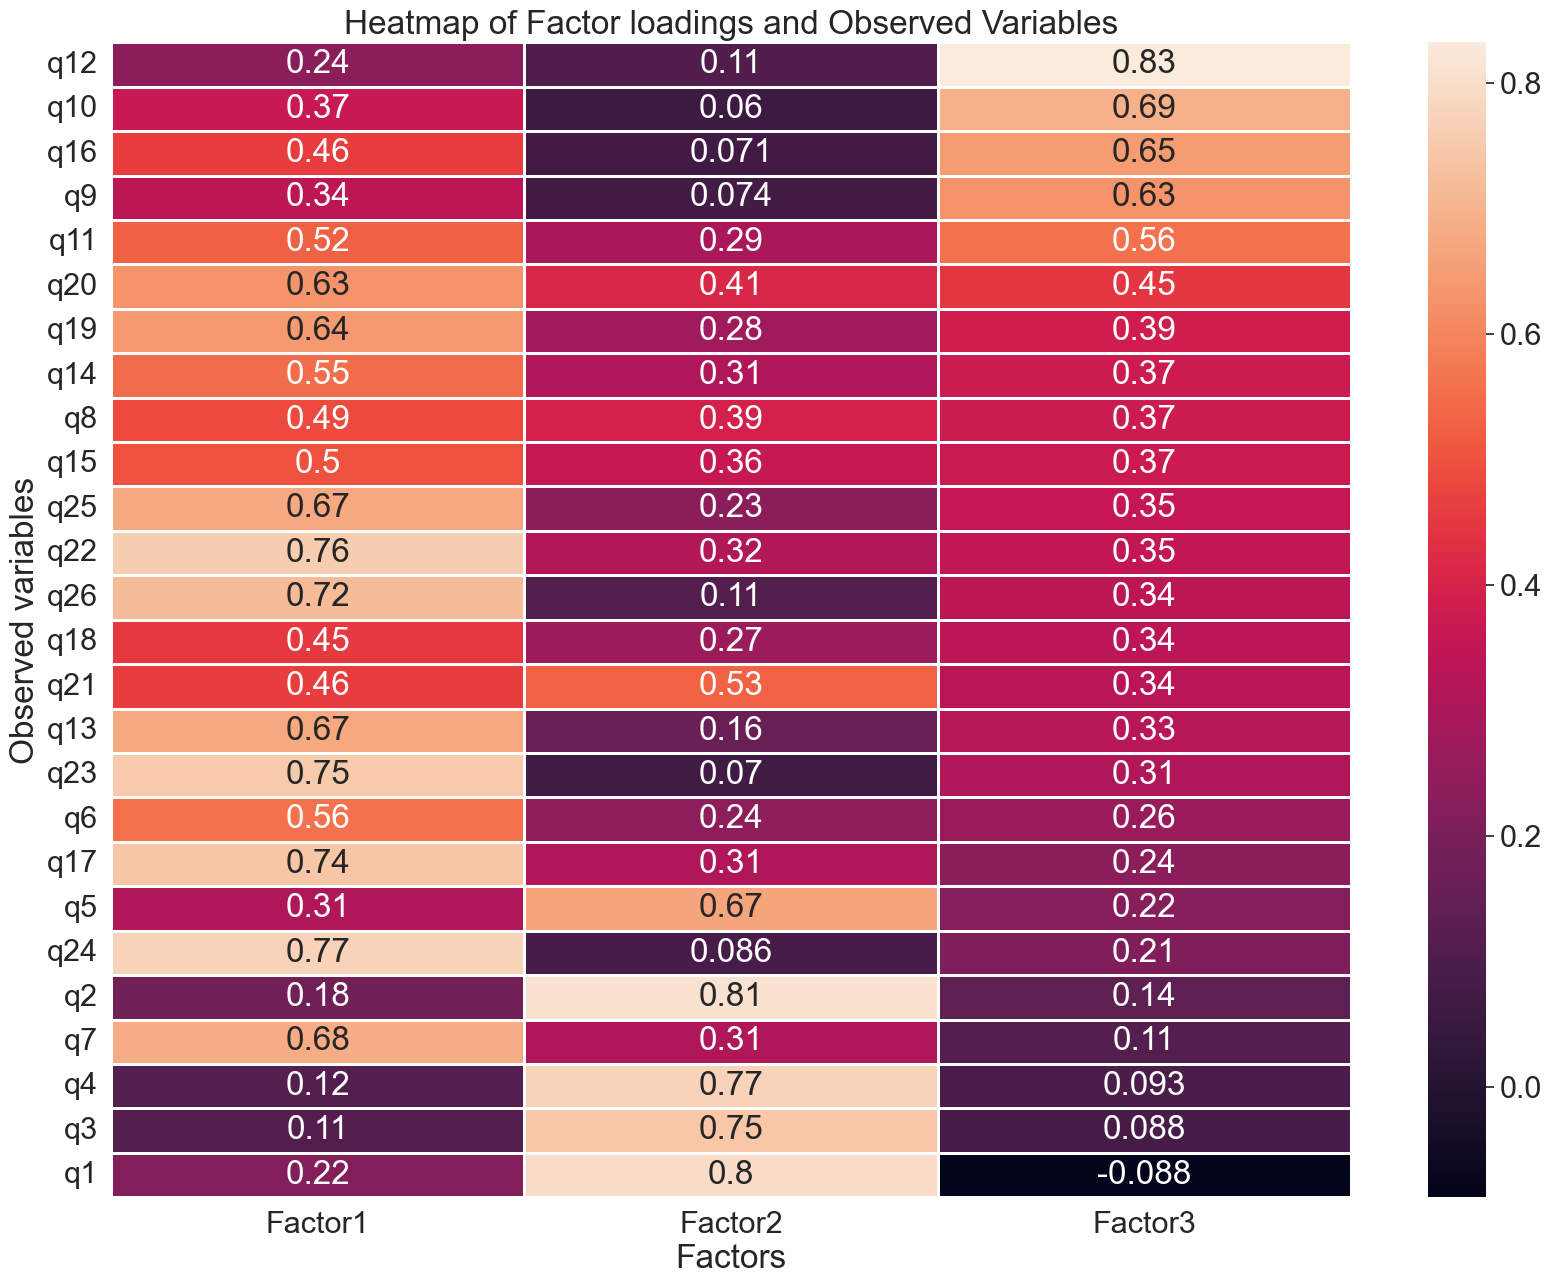

In [27]:
sn.set(font_scale=2)            # set font size
plt.subplots(figsize=(20,15))   # resize heatmap
sn.heatmap(data=factor_df.sort_values(by =['Factor3'], ascending=False),      # data name
                annot=True,     # setting the parameter values, display factor loading values in each cell
                linewidths=1)   # resize linewidths
plt.title("Heatmap of Factor loadings and Observed Variables")
plt.xlabel("Factors")
plt.ylabel("Observed variables")
plt.show()

### Factor 1

In [33]:
questions = pd.read_csv(r"C:\Training\Academy\Factor Analysis\Cases of Factor Analysis\Kaggle_Website satisfaction survey\questions.csv",
                       index_col=0)

In [41]:
pd.options.display.max_colwidth=100

In [42]:
questions.loc[[24, 22, 23, 17, 26, 7, 13, 25, 19, 20, 6, 14, 15]]

,Question
Qno,
24,This website is credible for me.
22,Overall. I am satisfied with accuracy for this website related to the buying process.
23,I trust the information presented on this website.
17,It is easy to learn to use the website.
26,I would recommend this website to my friend.
7,The information content provided by this website meets my needs.
13,In this website everything is consistent.
25,I would visit this website again.
19,Overall I am satisfied with the interface of this website.


**Content & Trusworthiness**

### Factor 2

In [43]:
questions.loc[[2,1,4,3,5,21]]

,Question
Qno,
2,The font color is appealing on this website.
1,It is easy to read the text on this website with the used font type and size.
4,The color scheme of this website is appealing.
3,The text alignment and spacing on this website make the text easy to read.
5,The use of color or graphics enhances navigation.
21,Overall. I am satisfied with the amount of time it took to complete the tasks for buying products.


**Aesthetics**

### Factor 3

In [44]:
questions.loc[[12,10,16,9,11]]

,Question
Qno,
12,This website provides content tailored to the individual.
10,This website offers customization.
16,It is easy to personalize or to narrow buying process.
9,This website provides adequate feedback to assess my progression when I perform a task.
11,This website offers versatility of ordering process.


**Personalized Experience**